In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

In [2]:
pd.set_option('max_columns' , None) #to see all the columns
df = pd.read_csv(r'C:\Users\Chitwan\Downloads\summeranalytics2020\train.csv')
df_test = pd.read_csv(r'C:\Users\Chitwan\Downloads\summeranalytics2020\test.csv')

In [3]:
df.shape

(1628, 29)

In [4]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [5]:
X = df.drop(["Attrition"] , axis = 1)

In [6]:
y = df["Attrition"]

In [7]:
X.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [8]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [11]:
#Now we'll check the categorical variables so as to determine whether to go for label encoding or One hot encoding.
obj_dict_train = { obj_col : list(X_train[obj_col].unique()) for obj_col in X_train.select_dtypes(include = 'object')}

In [12]:
obj_dict_train

{'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Laboratory Technician',
  'Sales Executive',
  'Healthcare Representative',
  'Manager',
  'Manufacturing Director',
  'Research Director',
  'Human Resources'],
 'MaritalStatus': ['Married', 'Single', 'Divorced'],
 'OverTime': ['No', 'Yes']}

In [13]:
obj_dict_test = {obj_col : list(X_test[obj_col].unique()) for obj_col in X_test.select_dtypes(include = 'object')}

In [14]:
obj_dict_test #checking wether the training set and testing set have the same categorical varaibles

{'BusinessTravel': ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Marketing',
  'Medical',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Manager',
  'Healthcare Representative',
  'Sales Executive',
  'Laboratory Technician',
  'Manufacturing Director',
  'Human Resources',
  'Research Director'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'OverTime': ['No', 'Yes']}

In [15]:
label_col = ["BusinessTravel" , "OverTime"] #Ordinal Categorical Data

In [16]:
OH_X_train = list(set(df.select_dtypes(include = "object")) - set(label_col))

In [17]:
OH_X_train

['Department', 'Gender', 'MaritalStatus', 'JobRole', 'EducationField']

In [18]:
#Now we'll begin with One Hot Encoding
X_train = pd.concat([X_train , pd.get_dummies(X_train[OH_X_train])] , axis = 1)
X_train.drop(OH_X_train, axis=1, inplace=True)

In [19]:
X_train.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
841,842,37,Travel_Rarely,19,2,61,2,3,2,3022,4,No,21,4,0,8,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1079,1080,31,Travel_Frequently,1,4,1427,2,1,3,1359,1,No,12,3,0,1,3,1,0,0,0,5,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1402,1403,25,Travel_Rarely,3,3,538,1,3,1,4031,5,No,13,3,1,6,5,2,2,0,2,3,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
512,513,56,Travel_Rarely,14,4,161,2,3,2,4963,9,Yes,18,3,3,7,2,5,4,4,3,5,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
341,342,19,Non-Travel,10,3,1248,1,2,2,1859,1,Yes,25,4,0,1,2,1,1,0,0,5,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [20]:
X_test = pd.concat([X_test , pd.get_dummies(X_test[OH_X_train])] , axis = 1)

In [21]:
X_test.drop(OH_X_train, axis = 1, inplace = True)

In [22]:
X_test.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
771,772,44,Non-Travel,17,3,1206,4,1,3,2290,2,No,13,3,0,6,3,0,0,0,0,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1471,1472,30,Travel_Frequently,12,4,648,2,2,1,2033,1,No,18,3,1,1,2,1,0,0,0,4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1536,1537,18,Travel_Frequently,5,3,614,2,3,2,1878,1,Yes,14,3,0,0,3,0,0,0,0,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1545,1546,28,Travel_Rarely,2,4,828,3,3,3,4382,6,No,17,3,0,5,3,2,2,2,1,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
202,203,46,Travel_Rarely,2,3,1204,3,3,1,17048,8,No,23,4,0,28,2,26,15,15,9,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [23]:
OH_X_test = list(set(df_test.select_dtypes(include = 'object')) - set(label_col))

In [24]:
df_test = pd.concat([df_test , pd.get_dummies(df_test[OH_X_test])] , axis = 1)

In [25]:
df_test.drop(OH_X_test , axis = 1 , inplace =True)

In [26]:
df_test.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,28,Travel_Rarely,9,3,377,4,3,4,2070,1,No,23,4,1,5,3,5,2,0,4,5,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,31,Travel_Rarely,6,4,653,1,4,4,5460,4,No,22,4,2,13,4,7,7,5,7,3,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,37,Travel_Rarely,6,3,474,3,4,1,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,42,Travel_Rarely,1,2,827,4,2,4,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,45,Non-Travel,4,2,972,3,3,2,4447,1,No,12,3,0,9,5,9,7,0,8,2,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
# Now we have to encode ordinal categorical variables
# Business Travel
cat1 = pd.Categorical(X_train.BusinessTravel , categories = ['Non-Travel' , 'Travel_Rarely' , 'Travel_Frequently'] , ordered = True)
labels1 , unique1 = pd.factorize(cat1 , sort =True)
X_train['BusinessTravel'] = labels1
# OverTime
cat2 = pd.Categorical(X_train.OverTime , categories = ['No' , 'Yes'] , ordered = True)
labels2 , unique2 = pd.factorize(cat2 , sort =True)
X_train['OverTime'] = labels2

In [28]:
cat3 = pd.Categorical(X_test.BusinessTravel , categories = ['Non-Travel' , 'Travel_Rarely' , 'Travel_Frequently'] , ordered = True)
labels3 , unique3 = pd.factorize(cat3 , sort =True)
X_test['BusinessTravel'] = labels3
# OverTime
cat4 = pd.Categorical(X_test.OverTime , categories = ['No' , 'Yes'] , ordered = True)
labels4 , unique4 = pd.factorize(cat4 , sort =True)
X_test['OverTime'] = labels4

In [29]:
#Encoding Test file
#Business Travel
cat_test = pd.Categorical(df_test.BusinessTravel , categories = ['Non-Travel' , 'Travel_Rarely' , 'Travel_Frequently'] , ordered = True)
labels_test , unique_test = pd.factorize(cat_test , sort =True)
df_test['BusinessTravel'] = labels_test
#OverTime
cat_test_1 = pd.Categorical(df_test.OverTime , categories = ['No' , 'Yes'] , ordered = True)
labels_test_1 , unique_test_1 = pd.factorize(cat_test_1 , sort =True)
df_test['OverTime'] = labels_test_1

In [30]:
X_train.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
841,842,37,1,19,2,61,2,3,2,3022,4,0,21,4,0,8,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1079,1080,31,2,1,4,1427,2,1,3,1359,1,0,12,3,0,1,3,1,0,0,0,5,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1402,1403,25,1,3,3,538,1,3,1,4031,5,0,13,3,1,6,5,2,2,0,2,3,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
512,513,56,1,14,4,161,2,3,2,4963,9,1,18,3,3,7,2,5,4,4,3,5,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
341,342,19,0,10,3,1248,1,2,2,1859,1,1,25,4,0,1,2,1,1,0,0,5,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [31]:
X_test.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
771,772,44,0,17,3,1206,4,1,3,2290,2,0,13,3,0,6,3,0,0,0,0,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1471,1472,30,2,12,4,648,2,2,1,2033,1,0,18,3,1,1,2,1,0,0,0,4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1536,1537,18,2,5,3,614,2,3,2,1878,1,1,14,3,0,0,3,0,0,0,0,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1545,1546,28,1,2,4,828,3,3,3,4382,6,0,17,3,0,5,3,2,2,2,1,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
202,203,46,1,2,3,1204,3,3,1,17048,8,0,23,4,0,28,2,26,15,15,9,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [32]:
df_test.drop(['Behaviour' , 'Gender_Female'] , axis = 1 , inplace = True)

In [33]:
df_test.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,28,1,9,3,377,4,3,4,2070,1,0,23,4,1,5,3,5,2,0,4,5,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,31,1,6,4,653,1,4,4,5460,4,0,22,4,2,13,4,7,7,5,7,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,37,1,6,3,474,3,4,1,5974,4,1,13,3,2,13,2,7,7,6,7,4,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,42,1,1,2,827,4,2,4,6062,9,1,13,3,1,8,4,4,3,0,2,5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,45,0,4,2,972,3,3,2,4447,1,0,12,3,0,9,5,9,7,0,8,2,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
X_train.nunique()

Id                                   1139
Age                                    43
BusinessTravel                          3
DistanceFromHome                       29
Education                               5
EmployeeNumber                        754
EnvironmentSatisfaction                 4
JobInvolvement                          4
JobSatisfaction                         4
MonthlyIncome                         717
NumCompaniesWorked                     10
OverTime                                2
PercentSalaryHike                      15
PerformanceRating                       2
StockOptionLevel                        4
TotalWorkingYears                      39
TrainingTimesLastYear                   7
YearsAtCompany                         32
YearsInCurrentRole                     18
YearsSinceLastPromotion                16
YearsWithCurrManager                   17
CommunicationSkill                      5
Behaviour                               1
Department_Human Resources        

In [36]:
#Feature Scaling
num_cols = [ col for col in X_train.columns if X_train[col].nunique() > 5]

In [48]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler(copy = False)
scaled_train = pd.DataFrame(num_scaler.fit_transform(X_train[num_cols]))
scaled_test = pd.DataFrame(num_scaler.fit_transform(X_test[num_cols]))
scaled_df_test = pd.DataFrame(num_scaler.fit_transform(df_test[num_cols]))
scaled_train.columns = num_cols
scaled_test.columns = num_cols
scaled_df_test.columns = num_cols
scaled_train.index = X_train.index
scaled_test.index = X_test.index
scaled_df_test.index = df_test.index


In [49]:
scaled_train.head()

,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
841,0.070534,0.180053,1.078634,-1.587666,-0.622567,0.489635,1.536427,-0.230686,-1.390671,-0.867085,-1.045218,-0.652193,-1.031295
1079,0.580143,-0.456513,-1.080319,0.740962,-1.016595,-0.677903,-0.894490,-1.183178,0.167592,-0.867085,-1.045218,-0.652193,-1.031295
1402,1.271755,-1.093079,-0.840435,-0.774522,-0.383496,0.878814,-0.624388,-0.502827,1.725855,-0.694516,-0.466601,-0.652193,-0.449211
512,-0.633925,2.195844,0.478925,-1.417196,-0.162670,2.435531,0.726121,-0.366757,-0.611539,-0.176811,0.112015,0.656790,-0.158169
341,-1.000073,-1.729644,-0.000842,0.435819,-0.898126,-0.677903,2.616835,-1.183178,-0.611539,-0.867085,-0.755910,-0.652193,-1.031295


In [51]:
X_train.drop(num_cols , axis = 1 , inplace = True)

In [52]:
X_train.head()

,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,OverTime,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
841,1,2,2,3,2,0,4,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1079,2,4,2,1,3,0,3,0,5,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1402,1,3,1,3,1,0,3,1,3,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
512,1,4,2,3,2,1,3,3,5,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
341,0,3,1,2,2,1,4,0,5,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [56]:
X_train = pd.concat([X_train , scaled_train] , axis = 1 )
X_test = pd.concat([X_test , scaled_test] , axis = 1)
df_test = pd.concat([df_test, scaled_df_test] , axis = 1)

In [59]:
df_test.head()

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,28,1,9,3,377,4,3,4,2070,1,0,23,4,1,5,3,5,2,0,4,5,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.728370,-0.984052,-0.036357,-1.107130,-0.949816,-0.664433,2.125004,-0.817865,0.229579,-0.351227,-0.647214,-0.692604,-0.074816
1,2,31,1,6,4,653,1,4,4,5460,4,0,22,4,2,13,4,7,7,5,7,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-1.720999,-0.656422,-0.407833,-0.641985,-0.236645,0.529007,1.854339,0.206510,1.022978,-0.011912,0.798559,0.837114,0.782826
2,3,37,1,6,3,474,3,4,1,5974,4,1,13,3,2,13,2,7,7,6,7,4,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.713629,-0.001162,-0.407833,-0.943655,-0.128513,0.529007,-0.581641,0.206510,-0.563819,-0.011912,0.798559,1.143058,0.782826
3,4,42,1,1,2,827,4,2,4,6062,9,1,13,3,1,8,4,4,3,0,2,5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-1.706258,0.544888,-1.026959,-0.348741,-0.110000,2.518073,-0.581641,-0.433725,1.022978,-0.520885,-0.358060,-0.692604,-0.646576
4,5,45,0,4,2,972,3,3,2,4447,1,0,12,3,0,9,5,9,7,0,8,2,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.698888,0.872518,-0.655483,-0.104371,-0.449755,-0.664433,-0.852305,-0.305678,1.816376,0.327403,0.798559,-0.692604,1.068706


In [61]:
plt.style.use('ggplot')
sns.set_style('white')

In [63]:
data_count = pd.concat([X_train.drop(columns = num_cols) , y] , axis = 1)

In [67]:
len(data_count.columns)

34

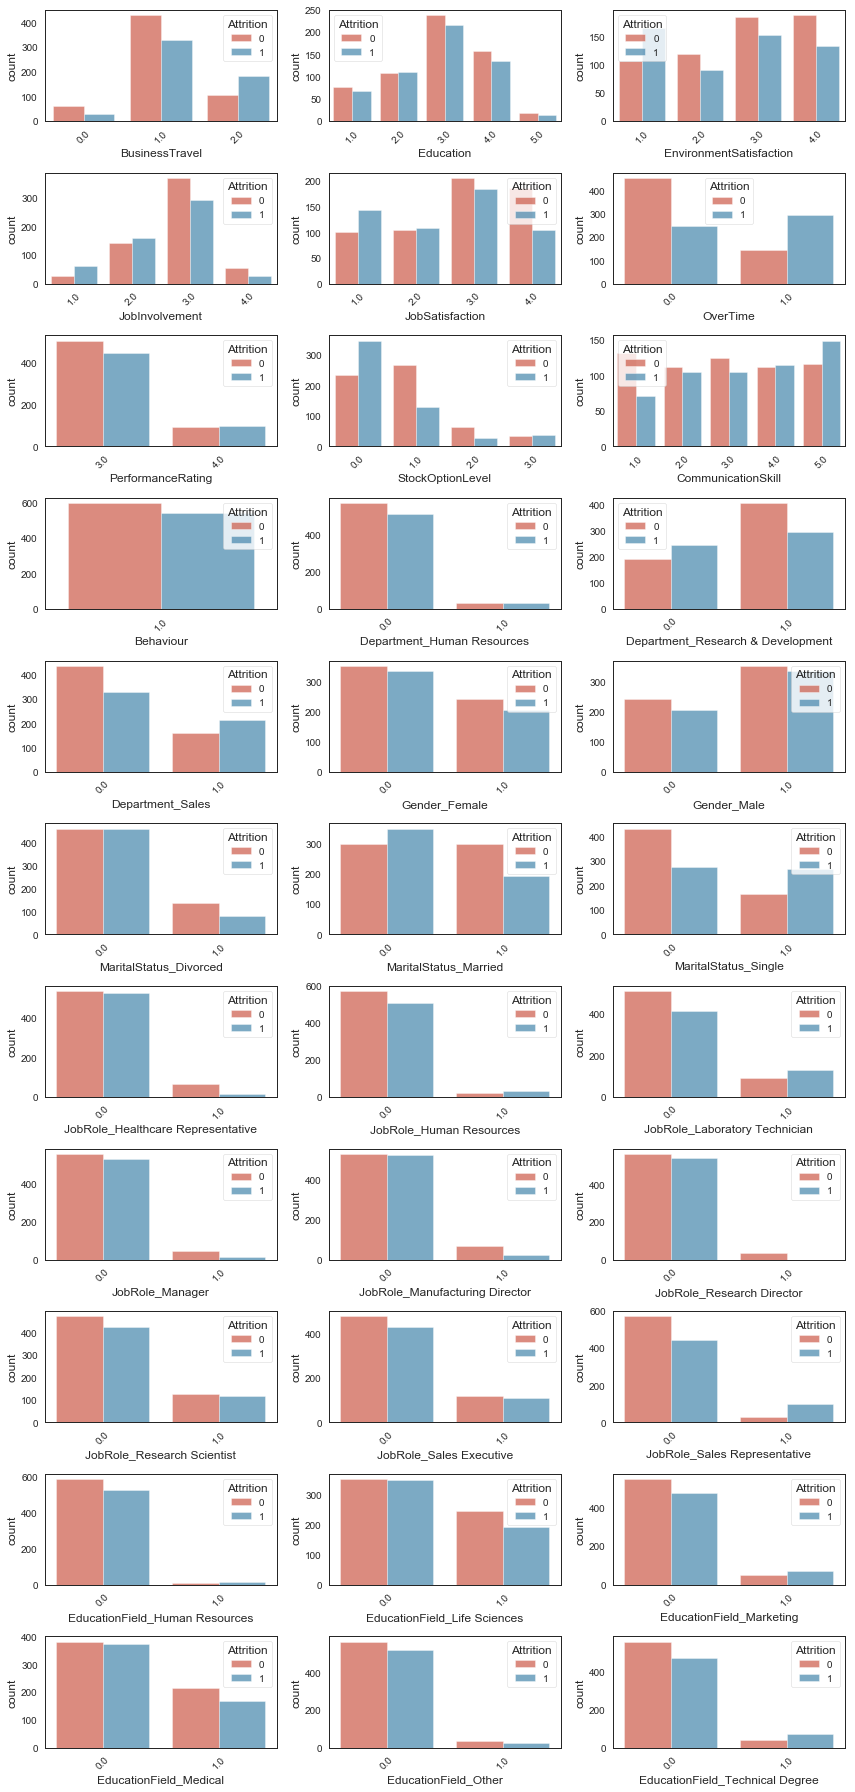

In [68]:
fig , axes = plt.subplots(round((len(data_count.columns)-1)/3) , 3 , figsize = (12,25))
for i, ax in enumerate(fig.axes):
    if i <= len(data_count.columns):
     ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
     sns.countplot(x=data_count.columns[i], hue=data_count.Attrition, alpha=0.7, data=data_count, ax=ax)

fig.tight_layout()

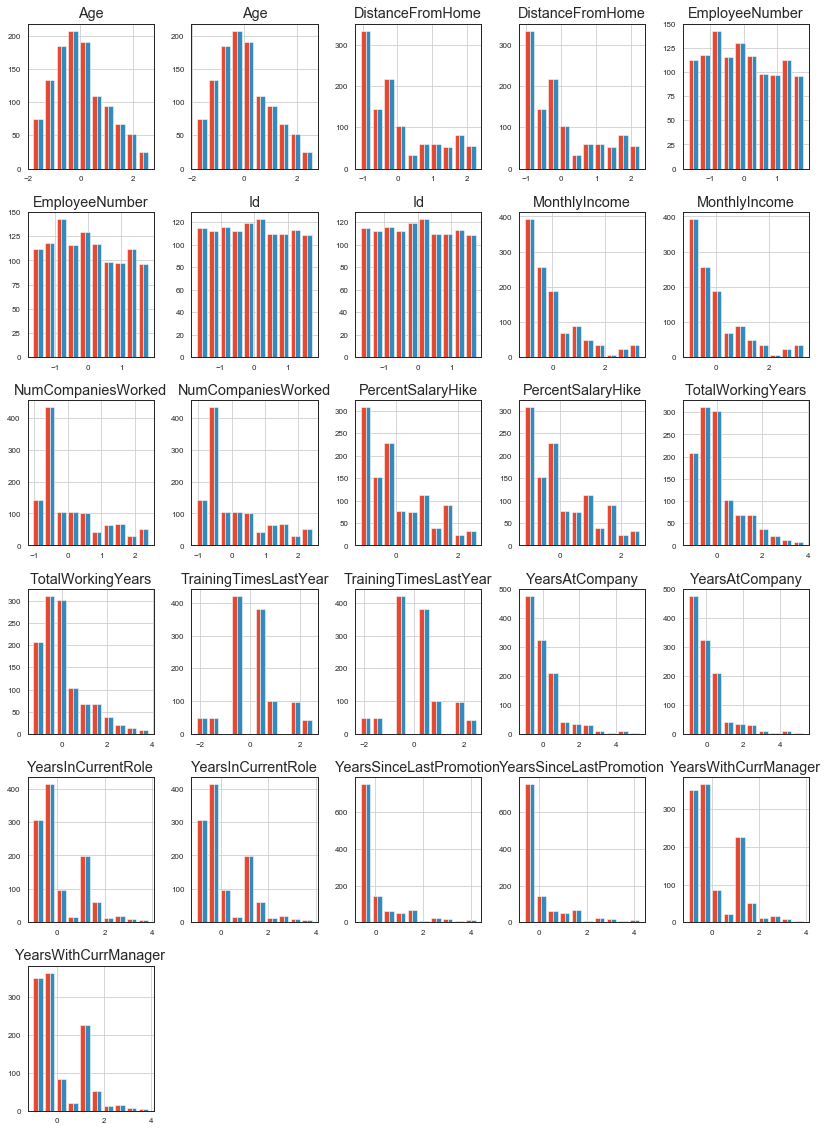

In [72]:
#Numerical Data
X_train[num_cols].hist(figsize = (14,20) ,  xlabelsize = 8 , ylabelsize = 8);

In [ ]:
#prediction

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(n_estimators = 500)

In [96]:
model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
preds = model.predict(X_test)

In [98]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [100]:
roc_auc_score(y_test,preds)

0.8425674997490715

In [101]:
df_test.shape

(470, 57)

In [102]:
X_train.shape

(1139, 57)

,Id,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,28,1,9,3,377,4,3,4,2070,1,0,23,4,1,5,3,5,2,0,4,5,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.728370,-0.984052,-0.036357,-1.107130,-0.949816,-0.664433,2.125004,-0.817865,0.229579,-0.351227,-0.647214,-0.692604,-0.074816
1,2,31,1,6,4,653,1,4,4,5460,4,0,22,4,2,13,4,7,7,5,7,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-1.720999,-0.656422,-0.407833,-0.641985,-0.236645,0.529007,1.854339,0.206510,1.022978,-0.011912,0.798559,0.837114,0.782826
2,3,37,1,6,3,474,3,4,1,5974,4,1,13,3,2,13,2,7,7,6,7,4,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.713629,-0.001162,-0.407833,-0.943655,-0.128513,0.529007,-0.581641,0.206510,-0.563819,-0.011912,0.798559,1.143058,0.782826
3,4,42,1,1,2,827,4,2,4,6062,9,1,13,3,1,8,4,4,3,0,2,5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-1.706258,0.544888,-1.026959,-0.348741,-0.110000,2.518073,-0.581641,-0.433725,1.022978,-0.520885,-0.358060,-0.692604,-0.646576
4,5,45,0,4,2,972,3,3,2,4447,1,0,12,3,0,9,5,9,7,0,8,2,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.698888,0.872518,-0.655483,-0.104371,-0.449755,-0.664433,-0.852305,-0.305678,1.816376,0.327403,0.798559,-0.692604,1.068706


In [118]:
X_train.head()

,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,OverTime,PerformanceRating,StockOptionLevel,CommunicationSkill,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
841,1,2,2,3,2,0,4,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.070534,0.180053,1.078634,-1.587666,-0.622567,0.489635,1.536427,-0.230686,-1.390671,-0.867085,-1.045218,-0.652193,-1.031295,0.070534,0.180053,1.078634,-1.587666,-0.622567,0.489635,1.536427,-0.230686,-1.390671,-0.867085,-1.045218,-0.652193,-1.031295
1079,2,4,2,1,3,0,3,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.580143,-0.456513,-1.080319,0.740962,-1.016595,-0.677903,-0.894490,-1.183178,0.167592,-0.867085,-1.045218,-0.652193,-1.031295,0.580143,-0.456513,-1.080319,0.740962,-1.016595,-0.677903,-0.894490,-1.183178,0.167592,-0.867085,-1.045218,-0.652193,-1.031295
1402,1,3,1,3,1,0,3,1,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.271755,-1.093079,-0.840435,-0.774522,-0.383496,0.878814,-0.624388,-0.502827,1.725855,-0.694516,-0.466601,-0.652193,-0.449211,1.271755,-1.093079,-0.840435,-0.774522,-0.383496,0.878814,-0.624388,-0.502827,1.725855,-0.694516,-0.466601,-0.652193,-0.449211
512,1,4,2,3,2,1,3,3,5,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.633925,2.195844,0.478925,-1.417196,-0.162670,2.435531,0.726121,-0.366757,-0.611539,-0.176811,0.112015,0.656790,-0.158169,-0.633925,2.195844,0.478925,-1.417196,-0.162670,2.435531,0.726121,-0.366757,-0.611539,-0.176811,0.112015,0.656790,-0.158169
341,0,3,1,2,2,1,4,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-1.000073,-1.729644,-0.000842,0.435819,-0.898126,-0.677903,2.616835,-1.183178,-0.611539,-0.867085,-0.755910,-0.652193,-1.031295,-1.000073,-1.729644,-0.000842,0.435819,-0.898126,-0.677903,2.616835,-1.183178,-0.611539,-0.867085,-0.755910,-0.652193,-1.031295


In [117]:
final_pred = model.predict(df_test)

In [119]:
final_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [123]:
output = pd.concat([df_test.Id,pd.Series(final_pred)], axis=1)
output.columns=['Id','Id2','Attrition']
output.set_index('Id' , inplace = True)

In [126]:
output.drop(columns = 'Id2' ,axis = 1 ,inplace = True)

In [129]:
output.to_csv("submission.csv",index=False)

In [130]:
output

,Attrition
Id,
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,1
